In [9]:
# 778. Swim in Rising Water
# You are given an n x n integer matrix grid where each value grid[i][j] represents the elevation at that point (i, j).
# It starts raining, and water gradually rises over time. 
# At time t, the water level is t, meaning any cell with elevation less than equal to t is submerged or reachable.
# You can swim from a square to another 4-directionally adjacent square if and only if the elevation of both squares individually are at most t. 
# You can swim infinite distances in zero time. Of course, you must stay within the boundaries of the grid during your swim.
# Return the minimum time until you can reach the bottom right square (n - 1, n - 1) if you start at the top left square (0, 0).
# Input: grid = [[0,2],[1,3]]
# Output: 3

# Explanation:
# At time 0, you are in grid location (0, 0) with elevation 0.
# You cannot go anywhere else because 4-directionally adjacent neighbors have a higher elevation than t = 0.
# You cannot reach point (1, 1) until time 3.
# When the time is 3, we can swim anywhere inside the grid.

In [10]:
import heapq
from typing import List

class Solution:
    def swimInWater(self, grid: List[List[int]]) -> int:
        # Get the grid size (grid is n x n)
        n = len(grid)
        
        # Define movement directions: right, down, left, up
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        # Initialize min-heap with starting position and its elevation
        # Format: (elevation_value, row_index, column_index)
        min_heap = [(grid[0][0], 0, 0)]
        
        # Keep track of visited cells to avoid cycles
        visited = set([(0, 0)])
        
        # Result will store the maximum elevation encountered (minimum time required)
        result = 0
        
        # Continue processing until heap is empty
        while min_heap:
            # Extract the cell with minimum elevation from heap
            elevation, x, y = heapq.heappop(min_heap)
            
            # Update result to the maximum elevation encountered so far
            # This represents the water level needed to reach current position
            result = max(result, elevation)
            
            # Check if we've reached the destination (bottom-right corner)
            if x == n - 1 and y == n - 1:
                return result
            
            # Explore all 4 adjacent cells
            for dx, dy in directions:
                # Calculate coordinates of adjacent cell
                nx, ny = x + dx, y + dy
                
                # Check if adjacent cell is within grid boundaries and not visited
                if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                    # Mark the cell as visited
                    visited.add((nx, ny))
                    
                    # Add the cell to heap with its elevation value
                    heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
        
        # Return the result (this line should not be reached with valid input)
        return result
    
# Example usage:
solution = Solution()  # Create an instance of the Solution class
grid = [[0,2],[1,3]]  # Define the test grid
print(solution.swimInWater(grid))  # Output: 3 - Call the method and print result

3


# --- Dijkstra's Algorithm Explained ---

## What is Dijkstra's Algorithm?

Dijkstra's Algorithm is a **greedy algorithm** that finds the **shortest path** between a starting node and all other nodes in a weighted graph.

## Core Concept:
- **Goal**: Find the path with minimum total distance/weight from start to destination
- **Approach**: Always explore the node with the smallest current distance first
- **Data Structure**: Uses a **priority queue (min-heap)** to efficiently get the next best node

## Algorithm Steps:

1. **Initialize** all distances to infinity except start node (distance = 0)
2. **Create min-heap** with (distance, node) pairs, starting with (0, start_node)
3. **Maintain visited set** to avoid reprocessing nodes
4. **Loop until heap is empty**:
   - Extract node with minimum distance
   - Update distances for all unvisited neighbors
   - Add neighbors to heap if shorter path found
5. **Terminate** when destination reached

## Connection to Swim in Rising Water:

```python
# Dijkstra's mapping to this problem:
# - "Distance" = Maximum elevation encountered so far
# - "Node" = Grid cell position (x, y)
# - "Weight" = Cell elevation value
# - "Shortest path" = Path with minimum maximum elevation
```

## Why Perfect for This Problem:

1. **Bottleneck Optimization**: We need to minimize the maximum elevation (water level)
2. **Greedy Choice**: Always exploring lower elevations first ensures optimal path
3. **Shortest Path Analogy**: "Shortest" = "lowest water level needed"

## Key Properties:
- **Time Complexity**: O(E log V) where E = edges, V = vertices
- **Space Complexity**: O(V) for visited set and heap
- **Guarantees**: Finds optimal solution for non-negative weights
- **Limitation**: Doesn't work with negative edge weights

## Algorithm in This Problem:
- **Nodes**: Grid cells (i, j)
- **Edges**: 4-directional adjacency
- **Edge Weight**: Maximum of current elevation and neighbor elevation
- **Goal**: Minimize the maximum elevation encountered from (0,0) to (n-1,n-1)

The algorithm is perfect for problems where you need to find a path that minimizes some "cost" metric - in this case, the water level needed to swim!

In [11]:
# Step-by-Step Visualization of Dijkstra's Algorithm

import heapq
from typing import List

def visualize_swim_in_water(grid: List[List[int]]) -> int:
    """Swim in Rising Water with detailed step-by-step visualization"""
    n = len(grid)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    min_heap = [(grid[0][0], 0, 0)]
    visited = set([(0, 0)])
    result = 0
    
    print("🏊‍♂️ Swim in Rising Water - Step-by-Step Visualization")
    print("=" * 60)
    print(f"Grid: {grid}")
    print(f"Start: (0,0) with elevation {grid[0][0]}")
    print(f"Destination: ({n-1},{n-1}) with elevation {grid[n-1][n-1]}")
    print()
    
    step = 1
    while min_heap:
        print(f"📍 Step {step}: Processing heap {sorted(min_heap)}")
        elevation, x, y = heapq.heappop(min_heap)
        print(f"   Extract: ({x},{y}) with elevation {elevation}")
        
        result = max(result, elevation)
        print(f"   Water Level: max({result}, {elevation}) = {result}")
        
        if x == n - 1 and y == n - 1:
            print(f"   🎯 Destination reached! Final water level: {result}")
            return result
        
        print(f"   Current visited: {visited}")
        print("   Exploring neighbors:")
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                visited.add((nx, ny))
                heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
                print(f"     → Add ({nx},{ny}) elevation {grid[nx][ny]} to heap")
        
        print(f"   Updated heap: {sorted(min_heap)}")
        print(f"   Updated visited: {visited}")
        print("-" * 40)
        step += 1
    
    return result

# Test the visualization
print("🚀 Running Step-by-Step Visualization:")
print("=" * 60)
grid = [[0,2],[1,3]]
visualize_swim_in_water(grid)

# --- Visualization Summary ---
print("""
📊 VISUALIZATION SUMMARY:
═══════════════════════════════════════════════════════════

🏁 Starting Point: (0,0) with elevation 0
🎯 Ending Point: (1,1) with elevation 3

🛣️ Path Found: (0,0) → (1,0) → (1,1)
📈 Elevations: [0, 1, 3]
💧 Final Water Level: 3

⚡ Key Algorithm Behaviors:
   • Always selects cell with smallest elevation from heap
   • Water level = maximum elevation encountered so far
   • Greedy choice ensures optimal solution
   • Terminates when destination is reached

🧠 Why Dijkstra's Works Here:
   • "Distance" = Maximum elevation on path
   • "Weight" = Cell elevation values
   • "Shortest path" = Path with minimum maximum elevation
   • Min-heap ensures we always explore lowest available elevation first
""")

🚀 Running Step-by-Step Visualization:
🏊‍♂️ Swim in Rising Water - Step-by-Step Visualization
Grid: [[0, 2], [1, 3]]
Start: (0,0) with elevation 0
Destination: (1,1) with elevation 3

📍 Step 1: Processing heap [(0, 0, 0)]
   Extract: (0,0) with elevation 0
   Water Level: max(0, 0) = 0
   Current visited: {(0, 0)}
   Exploring neighbors:
     → Add (0,1) elevation 2 to heap
     → Add (1,0) elevation 1 to heap
   Updated heap: [(1, 1, 0), (2, 0, 1)]
   Updated visited: {(0, 1), (1, 0), (0, 0)}
----------------------------------------
📍 Step 2: Processing heap [(1, 1, 0), (2, 0, 1)]
   Extract: (1,0) with elevation 1
   Water Level: max(1, 1) = 1
   Current visited: {(0, 1), (1, 0), (0, 0)}
   Exploring neighbors:
     → Add (1,1) elevation 3 to heap
   Updated heap: [(2, 0, 1), (3, 1, 1)]
   Updated visited: {(0, 1), (1, 0), (1, 1), (0, 0)}
----------------------------------------
📍 Step 3: Processing heap [(2, 0, 1), (3, 1, 1)]
   Extract: (0,1) with elevation 2
   Water Level: max(2, 

Grid 1: [[0,2],[1,3]]


C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from

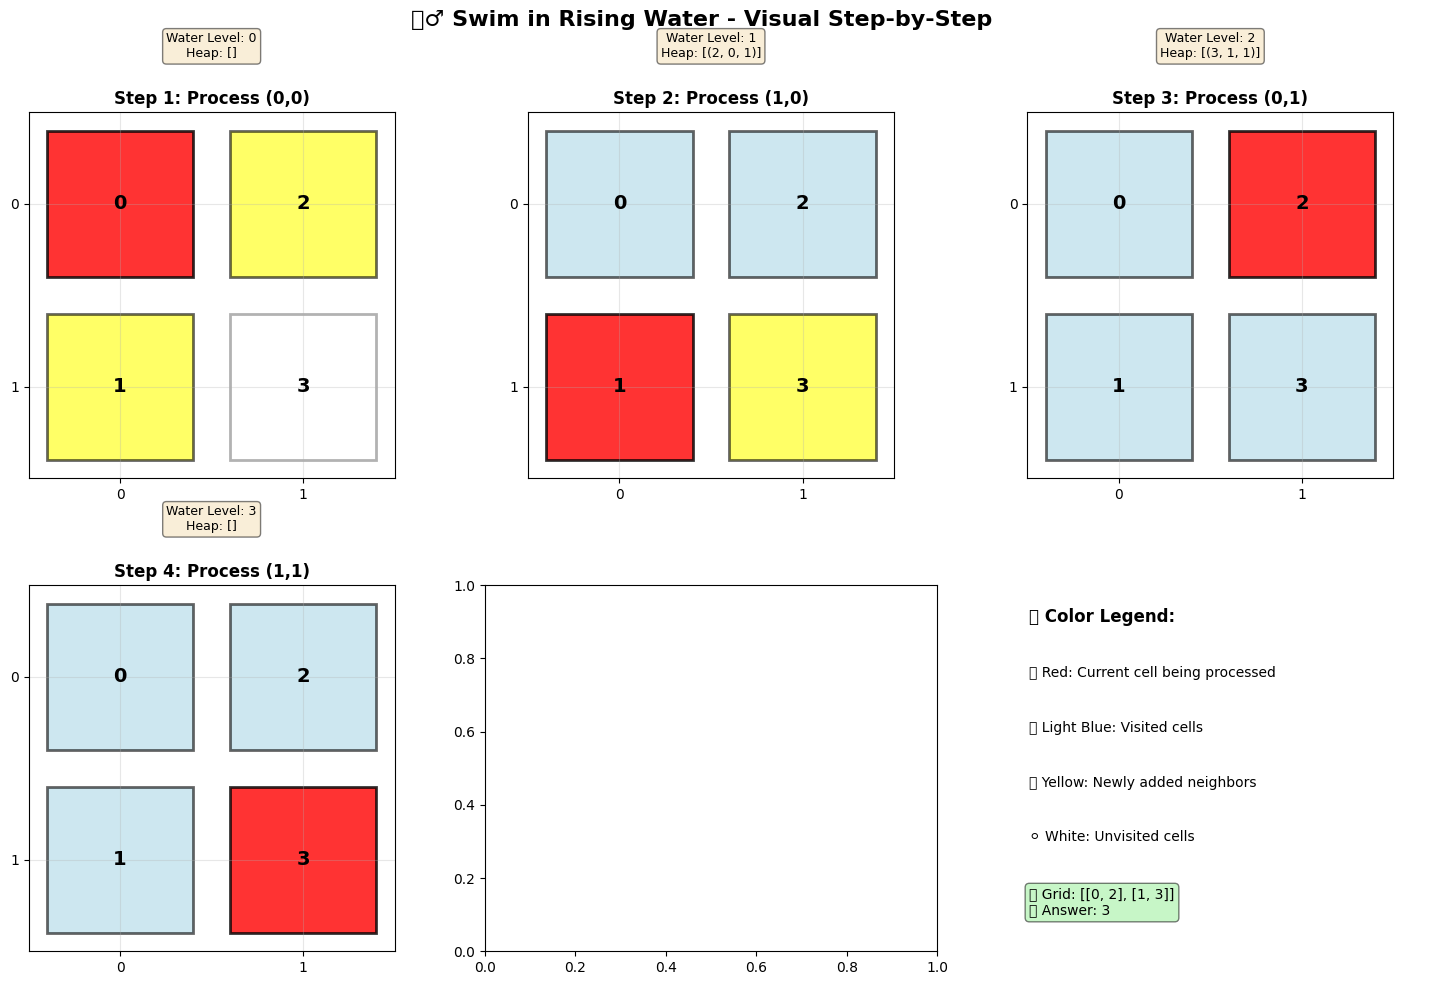

3

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import heapq

def visualize_swim_graphical(grid: List[List[int]]):
    """Create visual step-by-step visualization with matplotlib"""
    n = len(grid)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    min_heap = [(grid[0][0], 0, 0)]
    visited = set([(0, 0)])
    result = 0

    # Store steps for visualization
    steps = []

    while min_heap:
        elevation, x, y = heapq.heappop(min_heap)
        result = max(result, elevation)

        # Record this step
        step_info = {
            'current': (x, y),
            'elevation': elevation,
            'water_level': result,
            'heap': list(min_heap).copy(),
            'visited': visited.copy(),
            'neighbors': []
        }

        if x == n - 1 and y == n - 1:
            step_info['reached'] = True
            steps.append(step_info)
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                visited.add((nx, ny))
                heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
                step_info['neighbors'].append((nx, ny))

        steps.append(step_info)

    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('🏊‍♂️ Swim in Rising Water - Visual Step-by-Step', fontsize=16, fontweight='bold')

    for idx, step in enumerate(steps):
        if idx >= 6:
            break

        ax = axes[idx // 3, idx % 3]
        ax.set_xlim(-0.5, n - 0.5)
        ax.set_ylim(-0.5, n - 0.5)
        ax.set_aspect('equal')
        ax.invert_yaxis()
        ax.set_title(f'Step {idx + 1}: Process ({step["current"][0]},{step["current"][1]})', fontweight='bold')
        ax.set_xticks(range(n))
        ax.set_yticks(range(n))
        ax.grid(True, alpha=0.3)

        # Draw grid with colors
        for i in range(n):
            for j in range(n):
                # Color logic
                if (i, j) == step['current']:
                    color = 'red'
                    alpha = 0.8
                elif (i, j) in step['visited']:
                    color = 'lightblue'
                    alpha = 0.6
                elif (i, j) in step['neighbors']:
                    color = 'yellow'
                    alpha = 0.6
                else:
                    color = 'white'
                    alpha = 0.3

                # Draw cell
                rect = patches.Rectangle((j - 0.4, i - 0.4), 0.8, 0.8,
                                        linewidth=2, edgecolor='black',
                                        facecolor=color, alpha=alpha)
                ax.add_patch(rect)

                # Add elevation text
                ax.text(j, i, str(grid[i][j]), ha='center', va='center',
                       fontsize=14, fontweight='bold')

        # Add legend
        legend_text = f'Water Level: {step["water_level"]}\n'
        legend_text += f'Heap: {sorted(step["heap"][:3])}'
        ax.text(0.5, -0.8, legend_text, ha='center', fontsize=9,
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Add color legend
    legend_ax = axes[1, 2] if len(steps) < 6 else plt.subplot(2, 3, 6)
    legend_ax.axis('off')
    legend_ax.text(0.1, 0.9, '🎨 Color Legend:', fontsize=12, fontweight='bold')
    legend_ax.text(0.1, 0.75, '🔴 Red: Current cell being processed', fontsize=10)
    legend_ax.text(0.1, 0.6, '🔵 Light Blue: Visited cells', fontsize=10)
    legend_ax.text(0.1, 0.45, '🟡 Yellow: Newly added neighbors', fontsize=10)
    legend_ax.text(0.1, 0.3, '⚪ White: Unvisited cells', fontsize=10)
    legend_ax.text(0.1, 0.1, f'📊 Grid: {grid}\n✅ Answer: {result}', fontsize=10,
                  bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

    plt.tight_layout()
    plt.show()

    return result

# Test the graphical visualization
grid1 = [[0,2],[1,3]]
print("Grid 1: [[0,2],[1,3]]")
visualize_swim_graphical(grid1)


Grid 2: Larger 5x5 grid


C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kuchris\AppData\Local\Temp\ipykernel_44604\164601996.py:109: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from

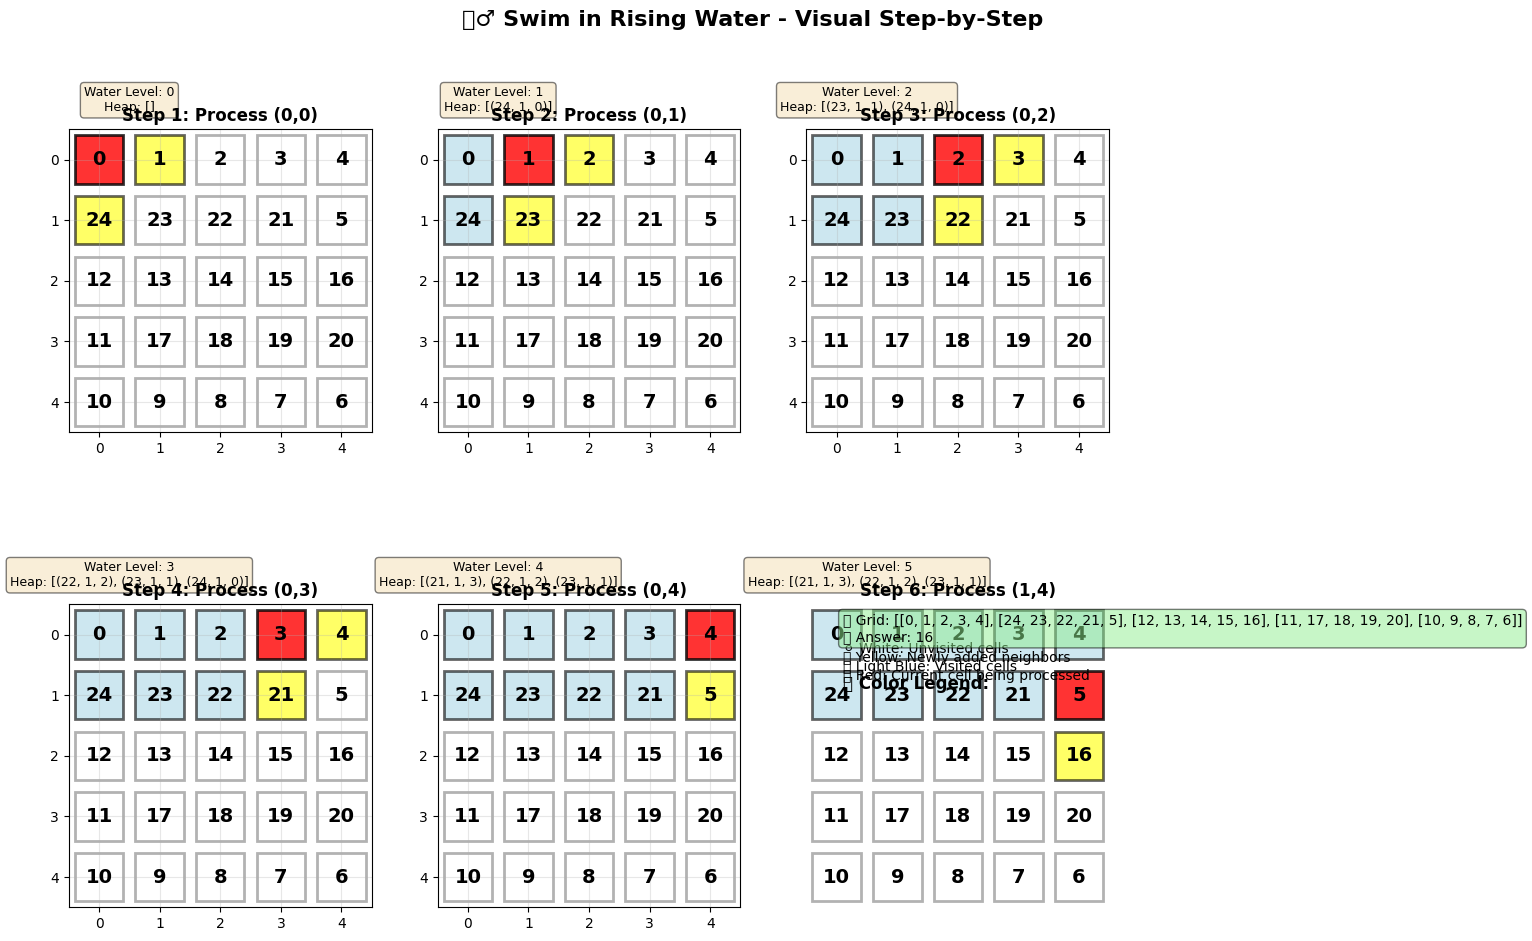

16

In [13]:
# More complex example with 3x3 grid
grid2 = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]

print("\n" + "="*60)
print("Grid 2: Larger 5x5 grid")
print("="*60)
visualize_swim_graphical(grid2)


3D Visualization - Grid 1: [[0,2],[1,3]]


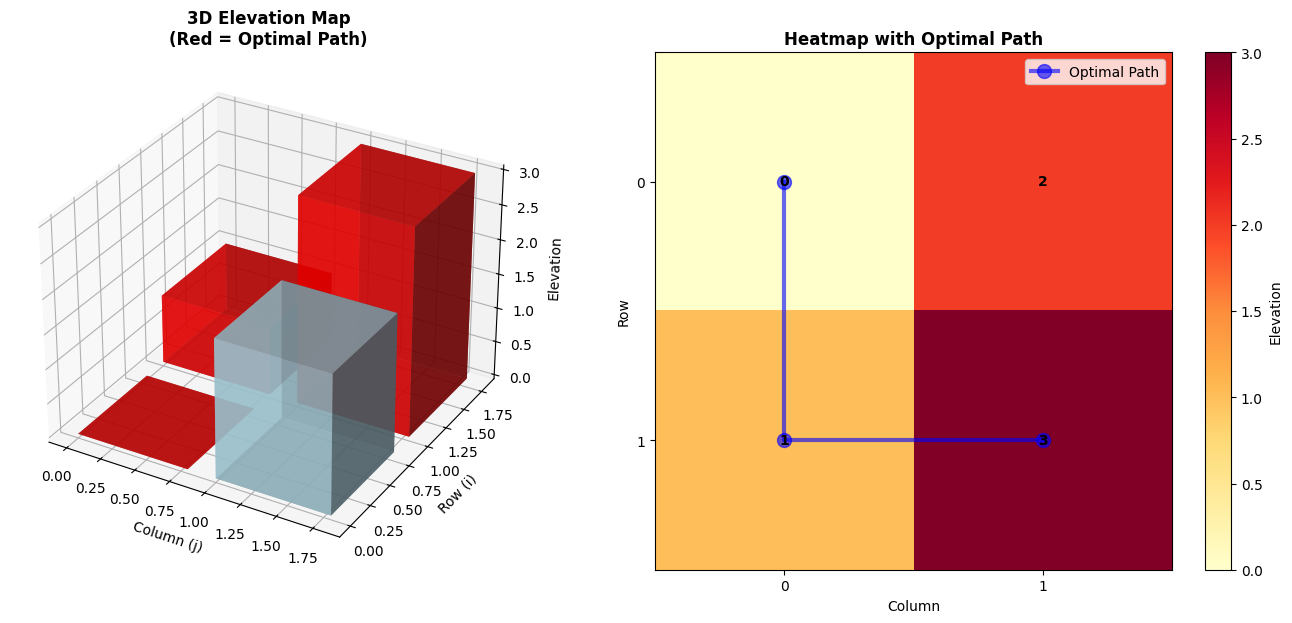

Optimal Path: (0,0) → (1,0) → (1,1)
Elevations on path: [0, 1, 3]
Maximum elevation (answer): 3


In [14]:
# 3D Visualization showing elevation as height
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_grid(grid: List[List[int]]):
    """Create 3D visualization of the grid showing elevations"""
    n = len(grid)
    
    # Run algorithm to get path
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    min_heap = [(grid[0][0], 0, 0)]
    visited = set([(0, 0)])
    path = [(0, 0)]
    parent = {}
    
    while min_heap:
        elevation, x, y = heapq.heappop(min_heap)
        
        if x == n - 1 and y == n - 1:
            # Reconstruct path
            current = (x, y)
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append((0, 0))
            path = path[::-1]
            break
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited:
                visited.add((nx, ny))
                parent[(nx, ny)] = (x, y)
                heapq.heappush(min_heap, (grid[nx][ny], nx, ny))
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 6))
    
    # Plot 1: 3D bars showing elevations
    ax1 = fig.add_subplot(121, projection='3d')
    
    xpos, ypos = [], []
    zpos = []
    dx = dy = 0.8
    dz = []
    colors = []
    
    for i in range(n):
        for j in range(n):
            xpos.append(j)
            ypos.append(i)
            zpos.append(0)
            dz.append(grid[i][j])
            
            # Color path cells differently
            if (i, j) in path:
                colors.append('red')
            elif (i, j) == (0, 0) or (i, j) == (n-1, n-1):
                colors.append('green')
            else:
                colors.append('lightblue')
    
    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, alpha=0.7)
    ax1.set_xlabel('Column (j)')
    ax1.set_ylabel('Row (i)')
    ax1.set_zlabel('Elevation')
    ax1.set_title('3D Elevation Map\n(Red = Optimal Path)', fontweight='bold')
    
    # Plot 2: Heatmap with path overlay
    ax2 = fig.add_subplot(122)
    
    # Create heatmap
    im = ax2.imshow(grid, cmap='YlOrRd', interpolation='nearest')
    
    # Add grid values
    for i in range(n):
        for j in range(n):
            text = ax2.text(j, i, grid[i][j],
                          ha="center", va="center", color="black", fontweight='bold')
    
    # Draw path
    if len(path) > 1:
        path_x = [p[1] for p in path]
        path_y = [p[0] for p in path]
        ax2.plot(path_x, path_y, 'b-o', linewidth=3, markersize=10, 
                label='Optimal Path', alpha=0.6)
    
    ax2.set_xticks(range(n))
    ax2.set_yticks(range(n))
    ax2.set_xlabel('Column')
    ax2.set_ylabel('Row')
    ax2.set_title('Heatmap with Optimal Path', fontweight='bold')
    ax2.legend()
    
    plt.colorbar(im, ax=ax2, label='Elevation')
    plt.tight_layout()
    plt.show()
    
    print(f"Optimal Path: {' → '.join([f'({p[0]},{p[1]})' for p in path])}")
    print(f"Elevations on path: {[grid[p[0]][p[1]] for p in path]}")
    print(f"Maximum elevation (answer): {max([grid[p[0]][p[1]] for p in path])}")

# Test 3D visualization
print("\n" + "="*60)
print("3D Visualization - Grid 1: [[0,2],[1,3]]")
print("="*60)
visualize_3d_grid(grid1)


3D Visualization - Grid 2: 5x5 spiral grid


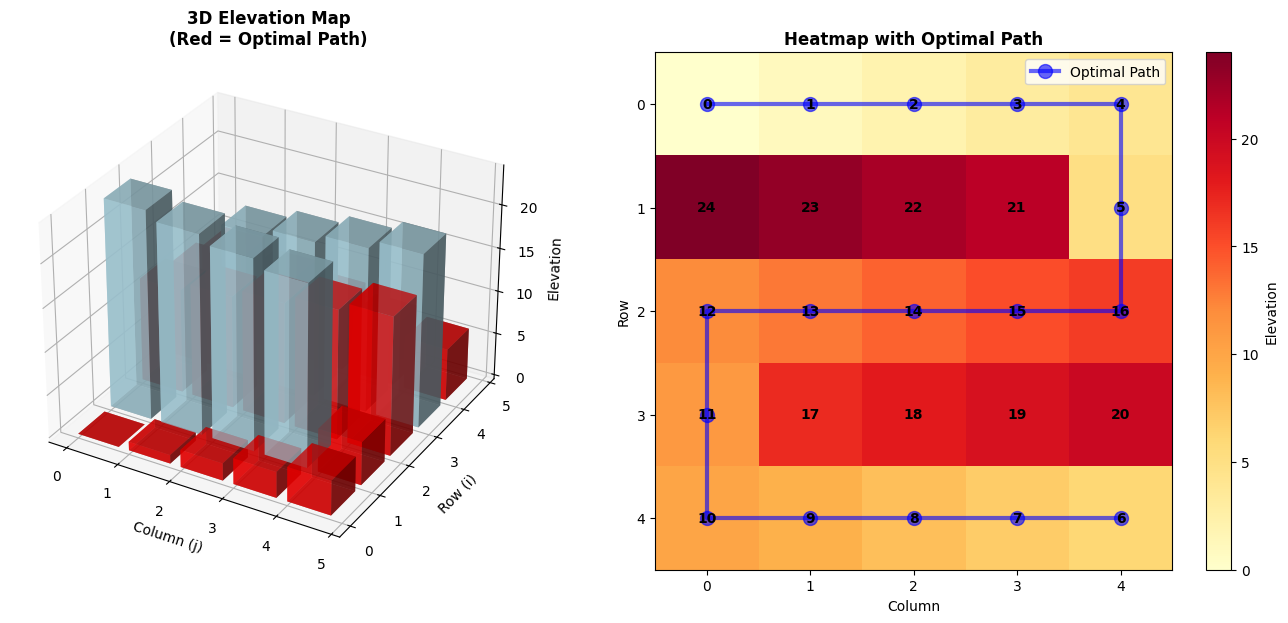

Optimal Path: (0,0) → (0,1) → (0,2) → (0,3) → (0,4) → (1,4) → (2,4) → (2,3) → (2,2) → (2,1) → (2,0) → (3,0) → (4,0) → (4,1) → (4,2) → (4,3) → (4,4)
Elevations on path: [0, 1, 2, 3, 4, 5, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
Maximum elevation (answer): 16


In [15]:
# 3D visualization for the larger grid
print("\n" + "="*60)
print("3D Visualization - Grid 2: 5x5 spiral grid")
print("="*60)
visualize_3d_grid(grid2)